# Predicting Stock Market Time Series 

Comparison of Classical methods (AR, MA, ARMA, ARIMA) and LSTM for forecasting "TATA Global Brewery" stock time series.

In [1]:
import pandas as pd
import numpy as np

#to plot within notebook
import matplotlib.pyplot as plt
%matplotlib inline

#setting figure size
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20,10

#for normalizing data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

#read the file
df = pd.read_csv('NSE-TATAGLOBAL.csv')

#print the head
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-10-08,208.00,222.25,206.85,216.00,215.15,4642146.0,10062.83
1,2018-10-05,217.00,218.60,205.90,210.25,209.20,3519515.0,7407.06
2,2018-10-04,223.50,227.80,216.15,217.25,218.20,1728786.0,3815.79
3,2018-10-03,230.00,237.50,225.75,226.45,227.60,1708590.0,3960.27
4,2018-10-01,234.55,234.60,221.05,230.30,230.90,1534749.0,3486.05


## Visualize the data

D:\ProgramData\Anaconda3\envs\tfgpu\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


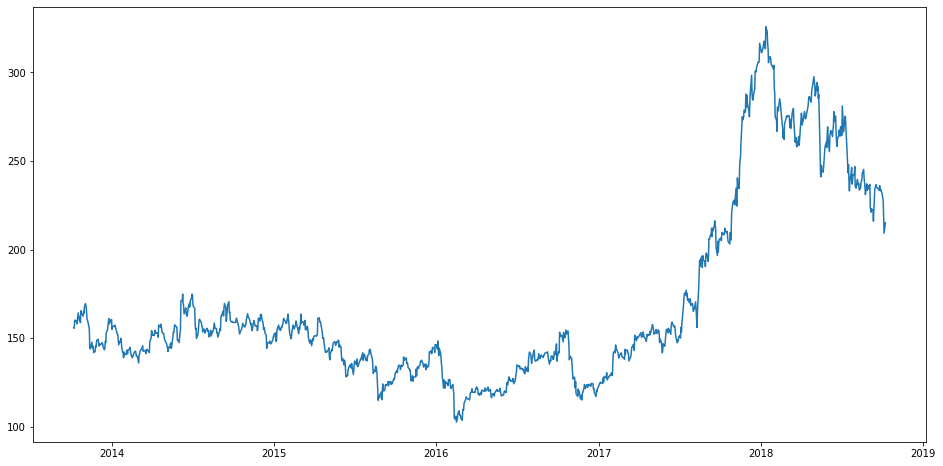

In [2]:
#setting index as date
df['Date'] = pd.to_datetime(df.Date,format='%Y-%m-%d')
df.index = df['Date']

#plot
plt.figure(figsize=(16,8))
plt.plot(df['Close'], label='Close Price history')
plt.show()

In [3]:
#creating dataframe with date and the target variable
data = df.sort_index(ascending=True, axis=0)
new_data = pd.DataFrame(index=range(0,len(df)),columns=['Date', 'Close'])

for i in range(0,len(data)):
     new_data['Date'][i] = data['Date'][i]
     new_data['Close'][i] = data['Close'][i]

In [4]:
new_data.shape

(1235, 2)

In [5]:
#splitting into train and validation
train = new_data[:935]
test = new_data[935:]
obs = np.array(test['Close'])

In [6]:
train['Date'].min(), train['Date'].max(), test['Date'].min(), test['Date'].max()

(Timestamp('2013-10-08 00:00:00'),
 Timestamp('2017-07-21 00:00:00'),
 Timestamp('2017-07-24 00:00:00'),
 Timestamp('2018-10-08 00:00:00'))

## AR Model

In [7]:
from statsmodels.tsa.ar_model import AR

# make prediction
history = train['Close'].tolist()
predictions = list()
mse = 0
for t in range(len(test)):
    model = AR(history)
    model_fit = model.fit(disp=0)
    output = model_fit.predict(len(history), len(history))
    yhat = output
    predictions.append(yhat)
    history.append(obs[t])
    mse = mse + (obs[t]-yhat)*(obs[t]-yhat)
    print('predicted=%f, expected=%f' % (yhat, obs[t]))
    history = history[1:]
mse = mse/len(test)
print('Mean Square Error = ', mse)

D:\ProgramData\Anaconda3\envs\tfgpu\lib\site-packages\statsmodels\tsa\ar_model.py:691: FutureWarning: 
statsmodels.tsa.AR has been deprecated in favor of statsmodels.tsa.AutoReg and
statsmodels.tsa.SARIMAX.

AutoReg adds the ability to specify exogenous variables, include time trends,
and add seasonal dummies. The AutoReg API differs from AR since the model is
treated as immutable, and so the entire specification including the lag
length must be specified when creating the model. This change is too
substantial to incorporate into the existing AR api. The function
ar_select_order performs lag length selection for AutoReg models.

AutoReg only estimates parameters using conditional MLE (OLS). Use SARIMAX to
estimate ARX and related models using full MLE via the Kalman Filter.

To silence this warning and continue using AR until it is removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.ar_model.AR', FutureWarning)

  warnings.warn(AR_DEPRECATION_WARN, FutureW

predicted=172.444867, expected=170.000000
predicted=168.674537, expected=171.150000
predicted=171.509422, expected=172.200000
predicted=170.659190, expected=168.400000
predicted=168.625364, expected=169.150000
predicted=167.940566, expected=169.550000
predicted=168.954734, expected=167.500000
predicted=167.259799, expected=165.100000
predicted=165.140418, expected=166.650000
predicted=166.122776, expected=166.450000
predicted=166.412410, expected=170.450000
predicted=170.277562, expected=166.000000
predicted=166.262620, expected=162.100000
predicted=162.059657, expected=156.000000
predicted=155.021919, expected=164.200000
predicted=164.036921, expected=178.750000
predicted=178.172702, expected=193.850000
predicted=195.541582, expected=190.600000
predicted=189.471194, expected=194.400000
predicted=194.233067, expected=196.150000
predicted=194.635629, expected=189.850000
predicted=190.662197, expected=196.550000
predicted=195.076062, expected=194.250000
predicted=193.811988, expected=193

predicted=249.756444, expected=238.650000
predicted=236.092205, expected=233.100000
predicted=234.521612, expected=238.600000
predicted=236.825868, expected=243.300000
predicted=244.864347, expected=246.300000
predicted=244.207159, expected=236.900000
predicted=238.174467, expected=239.100000
predicted=237.991021, expected=242.250000
predicted=243.304597, expected=242.200000
predicted=242.384599, expected=246.900000
predicted=247.776931, expected=235.650000
predicted=233.613802, expected=235.450000
predicted=236.752343, expected=234.650000
predicted=233.818393, expected=239.500000
predicted=241.641798, expected=237.600000
predicted=235.957110, expected=236.350000
predicted=235.624641, expected=237.300000
predicted=237.518618, expected=233.550000
predicted=233.018599, expected=234.550000
predicted=234.416053, expected=237.550000
predicted=235.675360, expected=239.350000
predicted=239.798499, expected=243.000000
predicted=244.664600, expected=245.150000
predicted=244.514607, expected=240

D:\ProgramData\Anaconda3\envs\tfgpu\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


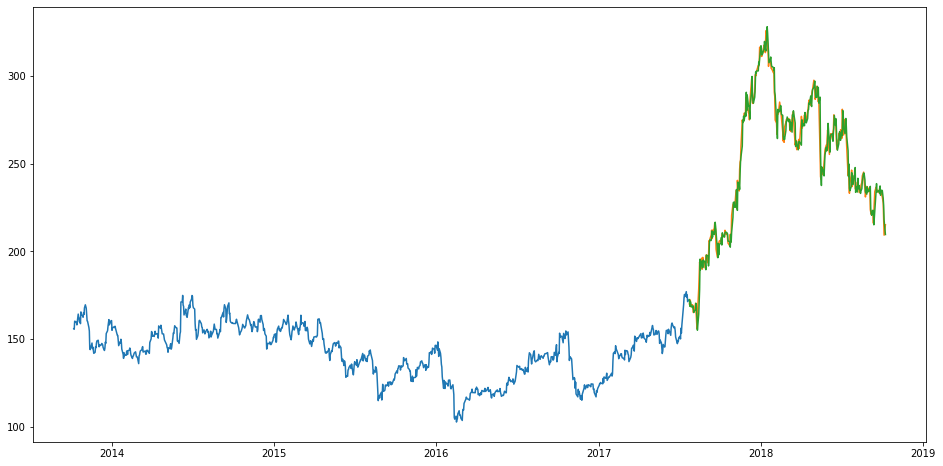

In [8]:
test['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.plot(train['Date'], train['Close'])
plt.plot(test['Date'], test[['Close', 'Predictions']])
plt.show()

## MA Model

In [9]:
from statsmodels.tsa.arima_model import ARMA

# make prediction
history = history = train['Close'].tolist()
predictions = list()
mse = 0
for t in range(len(test)):
    model = ARMA(history, order=(0,1))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    
    history.append(obs[t])
    mse = mse + (obs[t]-yhat)*(obs[t]-yhat)
    print('predicted=%f, expected=%f' % (yhat, obs[t]))
    
mse = mse/len(test)
print('Mean Square Error = ', mse)

D:\ProgramData\Anaconda3\envs\tfgpu\lib\site-packages\scipy\signal\signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]


predicted=161.491295, expected=170.000000
predicted=150.377876, expected=171.150000
predicted=161.665198, expected=172.200000
predicted=152.292985, expected=168.400000
predicted=157.438359, expected=169.150000
predicted=153.428033, expected=169.550000
predicted=157.510725, expected=167.500000
predicted=151.903578, expected=165.100000
predicted=154.875780, expected=166.650000
predicted=153.592873, expected=166.450000
predicted=154.619485, expected=170.450000
predicted=157.377830, expected=166.000000
predicted=150.791858, expected=162.100000
predicted=153.280203, expected=156.000000
predicted=145.403498, expected=164.200000
predicted=160.208356, expected=178.750000
predicted=160.015859, expected=193.850000
predicted=174.148442, expected=190.600000
predicted=158.201920, expected=194.400000
predicted=176.436236, expected=196.150000
predicted=161.299876, expected=189.850000
predicted=169.500668, expected=196.550000
predicted=168.162246, expected=194.250000
predicted=167.375623, expected=193

predicted=233.055068, expected=285.250000
predicted=212.543457, expected=287.500000
predicted=234.860958, expected=255.900000
predicted=182.355583, expected=242.650000
predicted=220.688063, expected=241.100000
predicted=181.874591, expected=247.500000
predicted=225.992094, expected=244.700000
predicted=180.347844, expected=243.550000
predicted=223.725635, expected=247.150000
predicted=185.065143, expected=250.200000
predicted=225.707224, expected=254.500000
predicted=190.419320, expected=257.850000
predicted=228.053017, expected=260.650000
predicted=194.257735, expected=257.500000
predicted=224.107963, expected=264.500000
predicted=201.975703, expected=269.200000
predicted=228.131747, expected=263.250000
predicted=197.018836, expected=255.250000
predicted=219.536456, expected=263.750000
predicted=205.996442, expected=265.750000
predicted=221.189334, expected=267.100000
predicted=207.820376, expected=266.950000
predicted=220.765525, expected=263.700000
predicted=205.111698, expected=267

D:\ProgramData\Anaconda3\envs\tfgpu\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


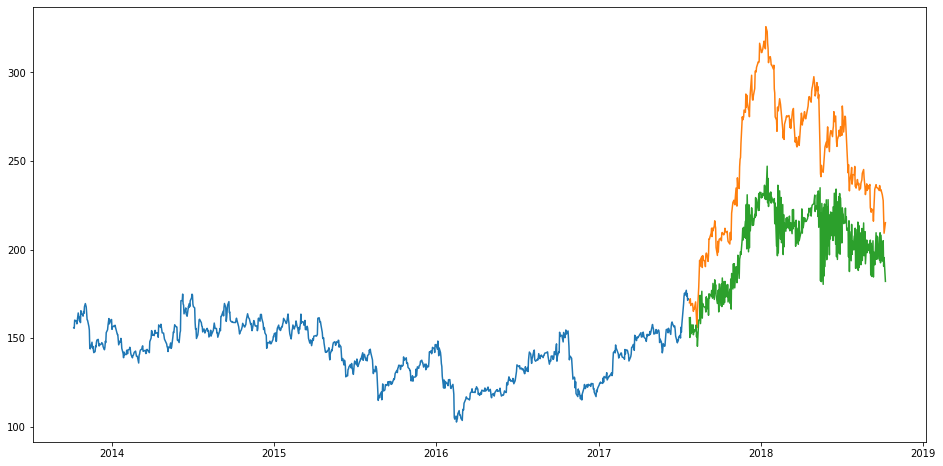

In [10]:
test['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.plot(train['Date'], train['Close'])
plt.plot(test['Date'], test[['Close', 'Predictions']])
plt.show()

## ARMA Model

In [11]:
from statsmodels.tsa.arima_model import ARMA

# make prediction
history = train['Close'].tolist()
predictions = list()
for t in range(len(test)):
    model = ARMA(history, order=(5,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    history.append(obs[t])
    history = history[1:]
    mse = mse + (obs[t]-yhat)*(obs[t]-yhat)
    print('predicted=%f, expected=%f' % (yhat, obs[t]))

mse = mse/len(test)
print('Mean Square Error = ', mse)

D:\ProgramData\Anaconda3\envs\tfgpu\lib\site-packages\scipy\signal\signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
D:\ProgramData\Anaconda3\envs\tfgpu\lib\site-packages\scipy\signal\signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]
D:\ProgramData\Anaconda3\envs\tfgpu\lib\site-packages\scipy\signal\signaltools.py:1350: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future th

predicted=171.955428, expected=170.000000
predicted=169.351895, expected=171.150000
predicted=171.010795, expected=172.200000
predicted=171.650350, expected=168.400000
predicted=168.415811, expected=169.150000
predicted=168.607884, expected=169.550000
predicted=168.910989, expected=167.500000
predicted=167.581583, expected=165.100000
predicted=164.720557, expected=166.650000
predicted=166.042035, expected=166.450000
predicted=166.176136, expected=170.450000
predicted=170.382422, expected=166.000000
predicted=165.789289, expected=162.100000
predicted=162.018434, expected=156.000000
predicted=155.055194, expected=164.200000
predicted=163.674158, expected=178.750000
predicted=178.634473, expected=193.850000
predicted=195.437950, expected=190.600000
predicted=190.243157, expected=194.400000
predicted=193.226843, expected=196.150000
predicted=194.441761, expected=189.850000
predicted=189.762648, expected=196.550000
predicted=195.658271, expected=194.250000
predicted=193.449534, expected=193

D:\ProgramData\Anaconda3\envs\tfgpu\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


predicted=259.239125, expected=274.900000
predicted=274.734634, expected=273.150000
predicted=273.685687, expected=274.050000
predicted=275.064106, expected=274.800000


D:\ProgramData\Anaconda3\envs\tfgpu\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=273.751659, expected=278.700000
predicted=278.770106, expected=277.450000
predicted=277.331211, expected=287.750000


D:\ProgramData\Anaconda3\envs\tfgpu\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=288.159612, expected=280.200000
predicted=279.827177, expected=287.100000


D:\ProgramData\Anaconda3\envs\tfgpu\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=288.024832, expected=283.550000
predicted=282.448778, expected=279.050000
predicted=279.972072, expected=279.950000
predicted=279.109425, expected=274.950000


D:\ProgramData\Anaconda3\envs\tfgpu\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
D:\ProgramData\Anaconda3\envs\tfgpu\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=274.768906, expected=284.000000
predicted=283.944022, expected=288.450000


D:\ProgramData\Anaconda3\envs\tfgpu\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


predicted=287.946487, expected=298.350000
predicted=299.314242, expected=287.800000


D:\ProgramData\Anaconda3\envs\tfgpu\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
D:\ProgramData\Anaconda3\envs\tfgpu\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=288.123486, expected=284.450000
predicted=284.824518, expected=284.300000
predicted=282.854742, expected=286.850000


D:\ProgramData\Anaconda3\envs\tfgpu\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=287.047185, expected=290.850000


D:\ProgramData\Anaconda3\envs\tfgpu\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
D:\ProgramData\Anaconda3\envs\tfgpu\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=290.956803, expected=300.650000
predicted=300.664076, expected=300.850000
predicted=301.007274, expected=300.150000
predicted=300.523934, expected=302.750000
predicted=302.106151, expected=305.950000
predicted=305.790500, expected=305.550000
predicted=305.801204, expected=306.600000
predicted=306.593143, expected=316.400000


D:\ProgramData\Anaconda3\envs\tfgpu\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


predicted=316.111497, expected=312.900000
predicted=313.140413, expected=311.150000
predicted=311.736922, expected=311.200000
predicted=310.372062, expected=312.250000


D:\ProgramData\Anaconda3\envs\tfgpu\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
D:\ProgramData\Anaconda3\envs\tfgpu\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=312.270375, expected=312.950000
predicted=312.949717, expected=317.600000
predicted=317.612382, expected=315.300000
predicted=315.375240, expected=314.100000
predicted=314.412007, expected=313.300000
predicted=312.841806, expected=325.750000
predicted=325.453134, expected=323.000000
predicted=323.036164, expected=316.400000


D:\ProgramData\Anaconda3\envs\tfgpu\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
D:\ProgramData\Anaconda3\envs\tfgpu\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=317.457015, expected=313.550000
predicted=312.885610, expected=305.450000
predicted=305.128358, expected=308.350000
predicted=308.328941, expected=308.850000


D:\ProgramData\Anaconda3\envs\tfgpu\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
D:\ProgramData\Anaconda3\envs\tfgpu\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=308.449970, expected=307.200000
predicted=307.706827, expected=304.250000


D:\ProgramData\Anaconda3\envs\tfgpu\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=304.198426, expected=304.250000
predicted=304.025102, expected=301.800000


D:\ProgramData\Anaconda3\envs\tfgpu\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


predicted=301.710923, expected=304.000000
predicted=304.006499, expected=290.650000
predicted=290.586040, expected=288.350000
predicted=288.465695, expected=274.850000
predicted=273.815281, expected=273.100000
predicted=272.976401, expected=266.700000


D:\ProgramData\Anaconda3\envs\tfgpu\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
D:\ProgramData\Anaconda3\envs\tfgpu\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=265.850660, expected=280.150000
predicted=279.937814, expected=280.450000
predicted=280.439738, expected=278.250000
predicted=279.014906, expected=285.100000
predicted=284.371312, expected=281.950000
predicted=281.922027, expected=279.050000
predicted=279.381763, expected=275.600000
predicted=275.037761, expected=267.950000
predicted=267.781959, expected=262.850000
predicted=262.442664, expected=266.600000
predicted=265.983858, expected=262.150000
predicted=262.161431, expected=270.700000
predicted=270.727817, expected=273.500000
predicted=273.158090, expected=275.000000
predicted=275.629525, expected=275.500000
predicted=275.151561, expected=274.850000
predicted=274.692700, expected=275.650000
predicted=275.442318, expected=274.150000
predicted=274.011351, expected=268.900000
predicted=268.870877, expected=273.400000
predicted=272.902990, expected=268.350000
predicted=268.246457, expected=276.050000
predicted=276.049218, expected=278.200000
predicted=277.806525, expected=278

D:\ProgramData\Anaconda3\envs\tfgpu\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


predicted=279.223327, expected=279.600000


D:\ProgramData\Anaconda3\envs\tfgpu\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


predicted=279.321785, expected=272.400000


D:\ProgramData\Anaconda3\envs\tfgpu\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=272.342447, expected=260.600000
predicted=260.458098, expected=262.050000
predicted=261.137170, expected=263.200000
predicted=262.790363, expected=258.850000
predicted=259.510656, expected=257.900000
predicted=257.711358, expected=262.200000
predicted=261.642139, expected=263.800000
predicted=263.868968, expected=258.750000
predicted=259.043545, expected=276.950000
predicted=276.189374, expected=274.800000
predicted=274.617611, expected=270.250000
predicted=271.841165, expected=273.000000
predicted=271.681537, expected=272.700000
predicted=272.359016, expected=277.800000
predicted=277.981143, expected=275.500000
predicted=275.329944, expected=273.850000
predicted=274.149465, expected=273.850000
predicted=273.290682, expected=275.500000
predicted=275.318167, expected=279.650000


D:\ProgramData\Anaconda3\envs\tfgpu\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=279.517084, expected=280.950000
predicted=280.962803, expected=284.100000
predicted=284.128560, expected=286.200000
predicted=285.944488, expected=286.300000
predicted=286.365575, expected=283.600000
predicted=283.552618, expected=283.150000
predicted=282.935361, expected=289.100000
predicted=288.621817, expected=291.200000
predicted=291.167261, expected=292.100000
predicted=292.409886, expected=297.550000
predicted=297.167012, expected=292.750000
predicted=292.787783, expected=286.650000
predicted=287.039053, expected=287.800000
predicted=287.027262, expected=294.200000
predicted=293.724172, expected=289.700000
predicted=290.178877, expected=292.000000


D:\ProgramData\Anaconda3\envs\tfgpu\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


predicted=292.225266, expected=285.250000
predicted=284.771962, expected=287.500000
predicted=287.659787, expected=255.900000
predicted=256.627276, expected=242.650000
predicted=242.229559, expected=241.100000
predicted=238.371040, expected=247.500000
predicted=247.814354, expected=244.700000
predicted=244.909936, expected=243.550000
predicted=243.709715, expected=247.150000
predicted=246.692112, expected=250.200000
predicted=250.094045, expected=254.500000
predicted=254.585688, expected=257.850000
predicted=257.831014, expected=260.650000
predicted=260.697209, expected=257.500000
predicted=257.454949, expected=264.500000
predicted=264.358033, expected=269.200000
predicted=268.955102, expected=263.250000
predicted=263.600656, expected=255.250000
predicted=255.127564, expected=263.750000
predicted=263.175824, expected=265.750000
predicted=265.295739, expected=267.100000
predicted=267.466029, expected=266.950000
predicted=266.808323, expected=263.700000
predicted=263.595167, expected=267

D:\ProgramData\Anaconda3\envs\tfgpu\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


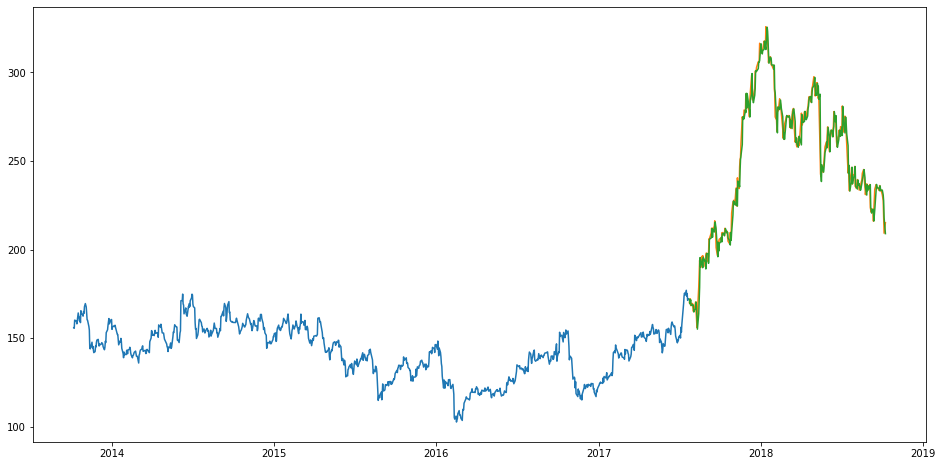

In [12]:
test['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.plot(train['Date'], train['Close'])
plt.plot(test['Date'], test[['Close', 'Predictions']])
plt.show()

## ARIMA Model

In [13]:
from statsmodels.tsa.arima_model import ARIMA

# make prediction
history = train['Close'].tolist()
predictions = list()
for t in range(len(test)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    history.append(obs[t])
    history = history[1:]
    mse = mse + (obs[t]-yhat)*(obs[t]-yhat)
    print('predicted=%f, expected=%f' % (yhat, obs[t]))

mse = mse/len(test)
print('Mean Square Error = ', mse)

D:\ProgramData\Anaconda3\envs\tfgpu\lib\site-packages\scipy\signal\signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
D:\ProgramData\Anaconda3\envs\tfgpu\lib\site-packages\scipy\signal\signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]
D:\ProgramData\Anaconda3\envs\tfgpu\lib\site-packages\scipy\signal\signaltools.py:1350: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future th

predicted=172.511772, expected=170.000000
predicted=169.647235, expected=171.150000
predicted=171.465435, expected=172.200000
predicted=171.904123, expected=168.400000
predicted=168.805823, expected=169.150000
predicted=168.903848, expected=169.550000
predicted=169.310442, expected=167.500000
predicted=167.951924, expected=165.100000
predicted=164.927007, expected=166.650000
predicted=166.409230, expected=166.450000
predicted=166.533897, expected=170.450000
predicted=170.639207, expected=166.000000
predicted=165.965618, expected=162.100000
predicted=162.348504, expected=156.000000
predicted=155.292795, expected=164.200000
predicted=164.197455, expected=178.750000
predicted=178.805587, expected=193.850000
predicted=195.624624, expected=190.600000
predicted=190.211246, expected=194.400000
predicted=193.921795, expected=196.150000
predicted=195.409041, expected=189.850000
predicted=190.651093, expected=196.550000
predicted=196.064699, expected=194.250000
predicted=194.104868, expected=193

predicted=285.010320, expected=287.500000
predicted=287.743542, expected=255.900000
predicted=257.278415, expected=242.650000
predicted=242.471326, expected=241.100000
predicted=238.992399, expected=247.500000
predicted=248.107921, expected=244.700000
predicted=246.690246, expected=243.550000
predicted=244.445343, expected=247.150000
predicted=246.984037, expected=250.200000
predicted=250.077816, expected=254.500000
predicted=254.937356, expected=257.850000
predicted=258.116252, expected=260.650000
predicted=260.793597, expected=257.500000
predicted=257.586059, expected=264.500000
predicted=264.425040, expected=269.200000
predicted=269.082600, expected=263.250000
predicted=263.765310, expected=255.250000
predicted=255.509333, expected=263.750000
predicted=263.112567, expected=265.750000
predicted=265.390624, expected=267.100000
predicted=267.972634, expected=266.950000
predicted=267.379923, expected=263.700000
predicted=263.540158, expected=267.600000
predicted=267.604620, expected=269

D:\ProgramData\Anaconda3\envs\tfgpu\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


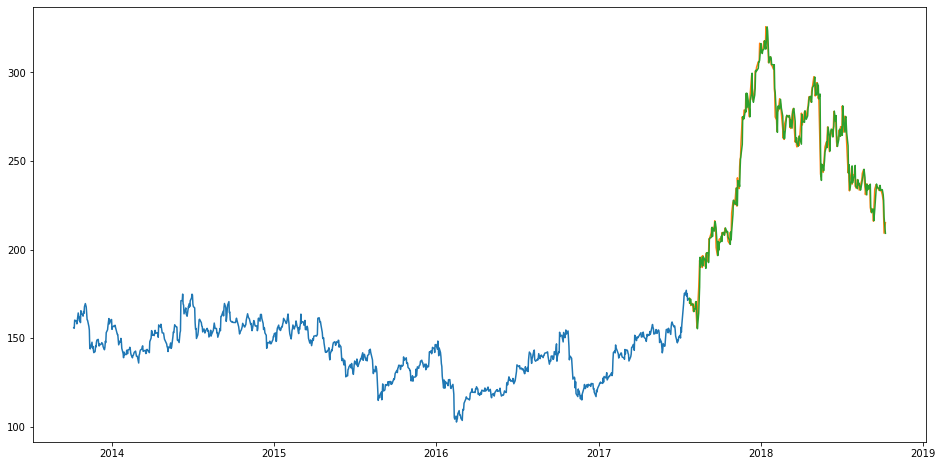

In [14]:
test['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.plot(train['Date'], train['Close'])
plt.plot(test['Date'], test[['Close', 'Predictions']])
plt.show()

## Long term ARIMA Prediction

In [15]:
from statsmodels.tsa.arima_model import ARIMA

# make prediction
history = train['Close'].tolist()
model = ARIMA(history, order=(5,1,0))
model_fit = model.fit(disp=0)
output = model_fit.forecast(len(test))

D:\ProgramData\Anaconda3\envs\tfgpu\lib\site-packages\scipy\signal\signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
D:\ProgramData\Anaconda3\envs\tfgpu\lib\site-packages\scipy\signal\signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]
D:\ProgramData\Anaconda3\envs\tfgpu\lib\site-packages\scipy\signal\signaltools.py:1350: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future th

D:\ProgramData\Anaconda3\envs\tfgpu\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


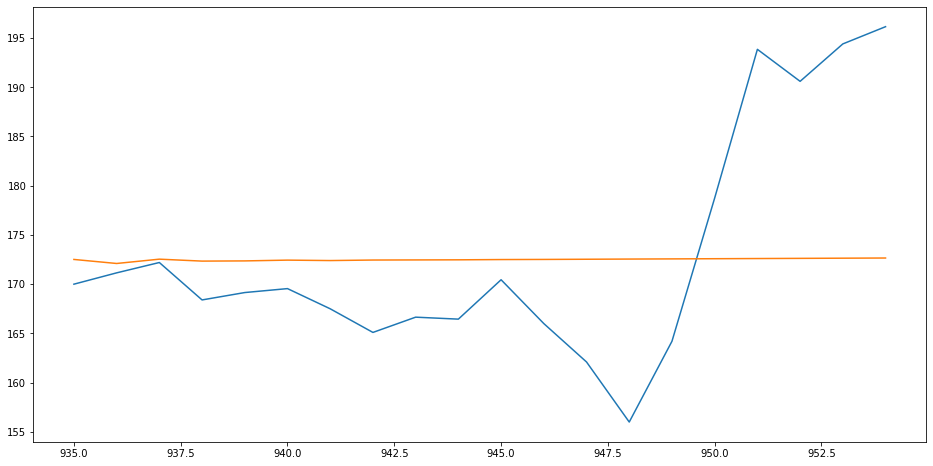

In [16]:
#for plotting
test['Predictions'] = output[0]
plt.figure(figsize=(16,8))
# plt.plot(train['Close'][:10])
plt.plot(test[['Close','Predictions']][:20])

## LSTM Model

In [17]:
#importing required libraries
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM

In [18]:
#creating dataframe
data = df.sort_index(ascending=True, axis=0)
new_data = pd.DataFrame(index=range(0,len(df)),columns=['Date', 'Close'])
for i in range(0,len(data)):
    new_data['Date'][i] = data['Date'][i]
    new_data['Close'][i] = data['Close'][i]

#setting index
new_data.index = new_data.Date
new_data.drop('Date', axis=1, inplace=True)

#creating train and test sets
dataset = new_data.values

In [19]:
train = dataset[0:935,:]
test = dataset[935:,:]

In [20]:
#converting dataset into x_train and y_train
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

x_train, y_train = [], []
for i in range(60,len(train)):
    x_train.append(scaled_data[i-60:i,0])
    y_train.append(scaled_data[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

D:\ProgramData\Anaconda3\envs\tfgpu\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [21]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50))
model.add(Dense(50, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train, y_train, epochs=20, batch_size=32)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
Instructions for updating:
Use tf.cast instead.
Epoch 1/20
875/875 [==============================] - 5s 5ms/sample - loss: 0.0079
Epoch 2/20
875/875 [==============================] - 1s 2ms/sample - loss: 0.0020
Epoch 3/20
875/875 [==============================] - 1s 2ms/sample - loss: 0.0014
Epoch 4/20
875/875 [==============================] - 1s 2ms/sample - loss: 0.0012
Epoch 5/20
875/875 [==============================] - 1s 2ms/sample - loss: 0.0011
Epoch 6/20
875/875 [==============================] - 1s 2ms/sample - loss: 0.0010
Epoch 7/20
875/875 [==============================] - 1s 2ms/sample - loss: 9.4657e-04
Epoch 8/20
875/875 [==============================] - 1s 2ms/sample - loss: 9.1949e-04
Epoch 9/20
875/875 [=========================

In [22]:
#predicting 246 values, using past 60 from the train data
inputs = new_data[len(new_data) - len(test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs  = scaler.transform(inputs)

X_test = []
for i in range(60,inputs.shape[0]):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)

X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
closing_price = model.predict(X_test)
closing_price = scaler.inverse_transform(closing_price)

In [23]:
mse=np.mean(np.power((test-closing_price),2))
mse

473.2857474982251

D:\ProgramData\Anaconda3\envs\tfgpu\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


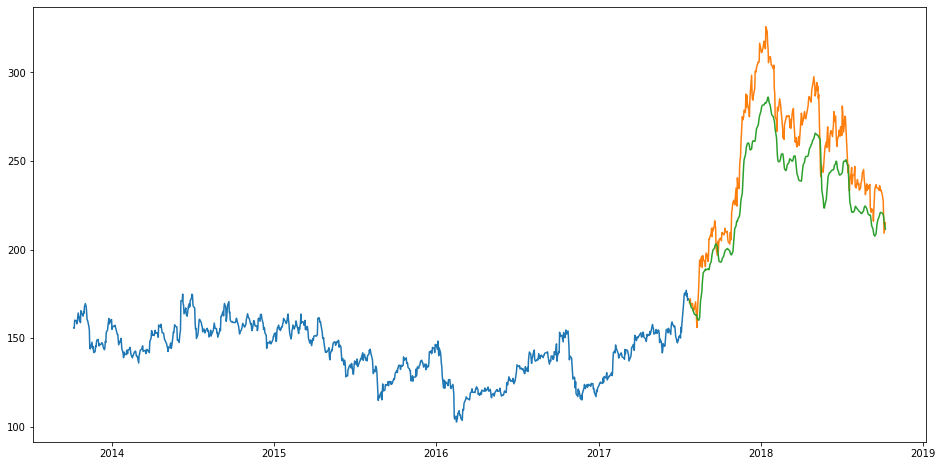

In [24]:
#for plotting
train = new_data[:935]
valid = new_data[935:]
valid['Predictions'] = closing_price
plt.figure(figsize=(16,8))
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])

## LSTM Long term prediction

In [25]:
# make prediction
inputs = new_data[len(new_data) - len(test) - 60:len(new_data) - len(test)].values
inputs = inputs.reshape(-1,1)
inputs  = scaler.transform(inputs)
history = inputs
history = history.reshape(1, 60, 1)
predictions = list()
mse = 0
for t in range(len(test)):
    yhat = model.predict(history)
    inputs = np.append(inputs, yhat)
    inputs = inputs[1:]
    history = inputs
    history = history.reshape(1, 60, 1)
    yhat = scaler.inverse_transform(yhat)
    predictions.append(yhat)
    mse = mse + (obs[t]-yhat)*(obs[t]-yhat)
    print('predicted=%f, expected=%f' % (yhat, obs[t]))

mse = mse/len(test)
print('Mean Square Error = ', mse)

predicted=171.063110, expected=170.000000
predicted=170.230392, expected=171.150000
predicted=169.199783, expected=172.200000
predicted=168.059982, expected=168.400000
predicted=166.866791, expected=169.150000
predicted=165.656342, expected=169.550000
predicted=164.452576, expected=167.500000
predicted=163.271866, expected=165.100000
predicted=162.125488, expected=166.650000
predicted=161.021271, expected=166.450000
predicted=159.964340, expected=170.450000
predicted=158.957840, expected=166.000000
predicted=158.003403, expected=162.100000
predicted=157.092789, expected=156.000000
predicted=156.223099, expected=164.200000
predicted=155.365341, expected=178.750000
predicted=154.547943, expected=193.850000
predicted=153.772858, expected=190.600000
predicted=153.036011, expected=194.400000
predicted=152.334549, expected=196.150000
predicted=151.666245, expected=189.850000
predicted=151.029190, expected=196.550000
predicted=150.420807, expected=194.250000
predicted=149.839401, expected=193

predicted=128.465851, expected=242.650000
predicted=128.450760, expected=241.100000
predicted=128.435791, expected=247.500000
predicted=128.420975, expected=244.700000
predicted=128.406296, expected=243.550000
predicted=128.391739, expected=247.150000
predicted=128.377304, expected=250.200000
predicted=128.362991, expected=254.500000
predicted=128.348801, expected=257.850000
predicted=128.334702, expected=260.650000
predicted=128.320724, expected=257.500000
predicted=128.306854, expected=264.500000
predicted=128.293091, expected=269.200000
predicted=128.279419, expected=263.250000
predicted=128.265869, expected=255.250000
predicted=128.252396, expected=263.750000
predicted=128.239029, expected=265.750000
predicted=128.225754, expected=267.100000
predicted=128.212570, expected=266.950000
predicted=128.199509, expected=263.700000
predicted=128.186508, expected=267.600000
predicted=128.173615, expected=269.600000
predicted=128.160812, expected=277.800000
predicted=128.148102, expected=272

D:\ProgramData\Anaconda3\envs\tfgpu\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


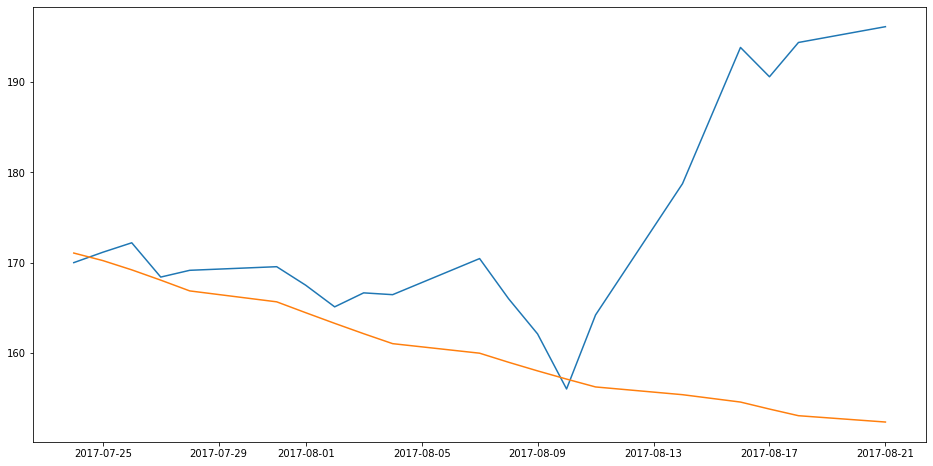

In [26]:
#for plotting
train = new_data[:935]
valid = new_data[935:]
valid['Predictions'] = predictions
plt.figure(figsize=(16,8))
# plt.plot(train['Close'][:10])
plt.plot(valid[['Close','Predictions']][:20])
plt.show()